<a href="https://colab.research.google.com/github/whistle-hikhi/K-Means-clustering/blob/main/agglomerative_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Mar 27 06:54:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
%load_ext cuml.accel

[2025-03-27 06:55:09.887] [CUML] [info] cuML: Installed accelerator for sklearn.
[2025-03-27 06:55:45.990] [CUML] [info] cuML: Installed accelerator for umap.
[2025-03-27 06:55:46.089] [CUML] [info] cuML: Installed accelerator for hdbscan.
[2025-03-27 06:55:46.089] [CUML] [info] cuML: Successfully initialized accelerator.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

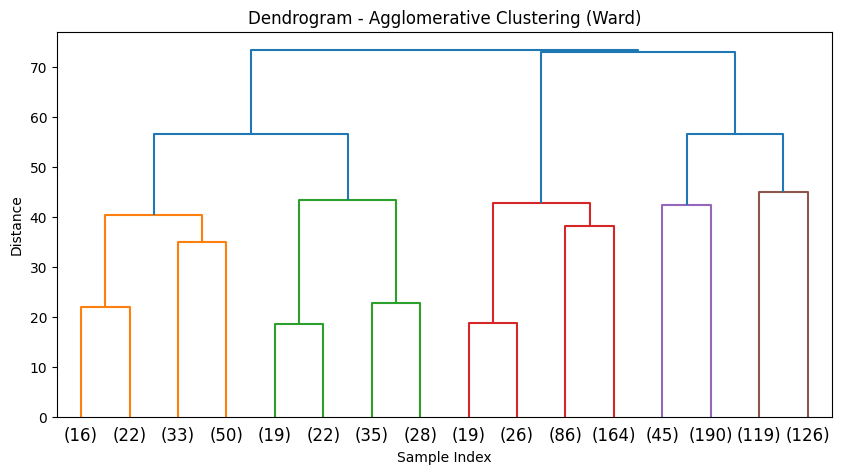

In [4]:
# Load MNIST subset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
subset_size = 1000
X_subset = X[:subset_size] / 255.0  # Normalize
y_subset = y[:subset_size]

# Compute linkage matrix for dendrogram (using Ward's method)
Z = linkage(X_subset, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='level', p=3)  # Show top 3 levels
plt.title('Dendrogram - Agglomerative Clustering (Ward)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [6]:
# Apply Agglomerative Clustering
%%time
agg_clust = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agg_clust.fit_predict(X_subset)


CPU times: user 181 ms, sys: 0 ns, total: 181 ms
Wall time: 180 ms


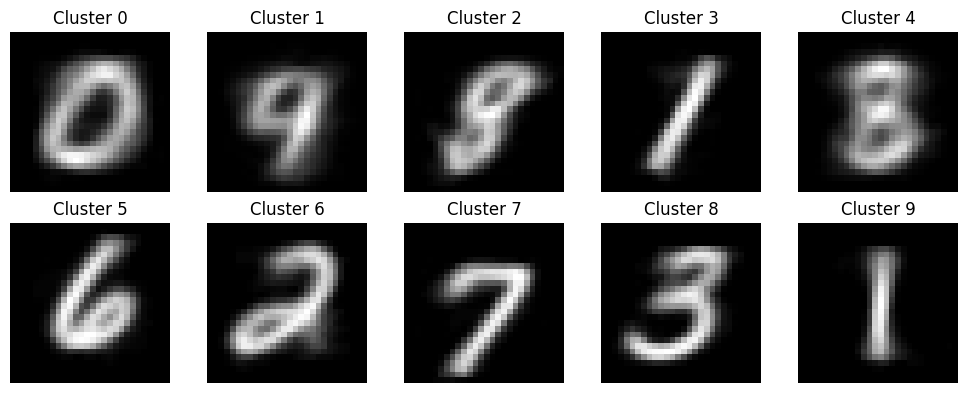

In [7]:

# Visualize a few "centroids" (mean of each cluster)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    cluster_points = X_subset[labels == i]
    if len(cluster_points) > 0:
        centroid = np.mean(cluster_points, axis=0).reshape(28, 28)
        ax.imshow(centroid, cmap='gray')
        ax.axis('off')
        ax.set_title(f'Cluster {i}')
plt.tight_layout()
plt.show()